**Step 1:Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Import data**

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/MPG.csv')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Describe data


In [ ]:
data.describe

<bound method NDFrame.describe of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle mali

In [ ]:
data.head

<bound method NDFrame.head of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  

Data preprocessing

In [ ]:

data1=data.dropna()

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


Data visualizing

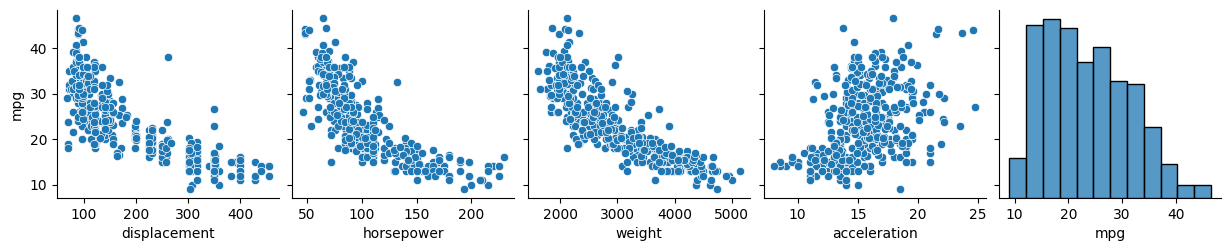

In [ ]:
sns.pairplot(data1,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

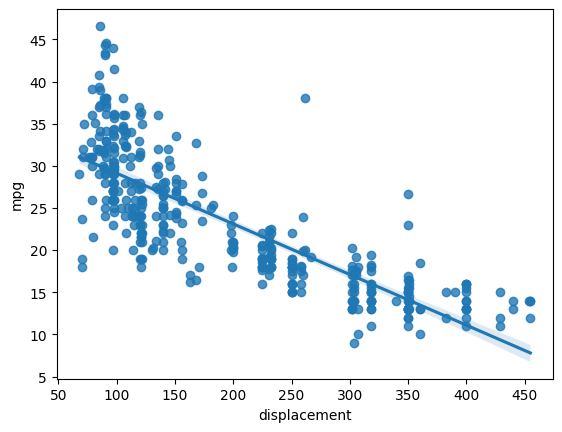

In [ ]:
sns.regplot(data1,x='displacement',y='mpg')

**Step 3:Define Target Variable (y) and Feature Variables (X)**

In [46]:
 data1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y=data1['mpg']
x=data1.drop(['mpg','cylinders','model_year', 'origin', 'name'],axis=1)

In [ ]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


Scalling data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
new_x=sc.fit_transform(x)


In [ ]:
pd.DataFrame(new_x).describe()


,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


**Step 4:Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_x,y,random_state=2332)

**Step 5:Model selection**

In [ ]:

from sklearn.linear_model import LinearRegression

In [48]:

model=LinearRegression()

**Step 6:train or fit model**

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:

model.intercept_

23.32489754583339

In [ ]:

model.coef_

array([-0.98514456, -1.73971909, -3.94427747,  0.02357939])

 **Step 7:Prediction of model**

In [ ]:

y_pred=model.predict(x_test)

**step 8:Model accuracy**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

18.348685196440112

In [ ]:

mean_absolute_error(y_test,y_pred)

3.349001337773157

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.14970933187680896

In [ ]:
r2_score(y_test,y_pred)

0.7267808415097514

***Polynomial regression***

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf=PolynomialFeatures(degree=3,interaction_only=True,include_bias=False)

In [ ]:
x_train2=pf.fit_transform(x_train)


In [ ]:
x_test2=pf.fit_transform(x_test)


In [ ]:
model.fit(x_train2,y_train)

LinearRegression()

In [ ]:

model.intercept_

20.7404132341046

In [ ]:
model.coef_


array([-2.15788502e+00, -5.22608154e+00, -1.67570026e+00, -2.12536220e+00,
        4.32472694e+00,  4.51130650e-01,  3.86516165e-03, -1.61777736e+00,
       -1.52319882e+00,  1.52162945e+00,  4.53426168e-01,  2.02017159e+00,
        1.26499137e+00, -1.73071111e+00])

Polynomialrergression Prediction


In [ ]:

y_pred2=model.predict(x_test2)

Accuracy

In [ ]:

from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error

In [ ]:
mean_absolute_error(y_test,y_pred2)

2.9902092247756027

In [ ]:

mean_absolute_percentage_error(y_test,y_pred2)

0.12974237431947003

In [ ]:

r2_score(y_test,y_pred2)


0.7763644230079777